1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
from scipy import stats
import seaborn as sns

--2021-11-29 16:29:57--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2021-11-29 16:29:58--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucedcc6750fadb50ef612191c9f7.dl.dropboxusercontent.com/cd/0/inline/Ba5oo5v_d92TZwnxBenKRLeVW2K8PY6AFChyH91nM64jh7S7fDc1VehO2RJ9Gq2yrAE09QRN0_zuksaJscNsTEhDHS0fCO0UJ4SAnymGEPbR7Bv7RT5W0trhGvsD4jdxaLS80SjrvHg7me4hzI0z68s0/file# [segue]
--2021-11-29 16:29:58--  https://ucedcc6750fadb50ef612191c9f7.dl.dropboxusercontent.com/cd/0/inline/Ba5oo5v_d92TZwnxBenKRLeVW2K8PY6AF

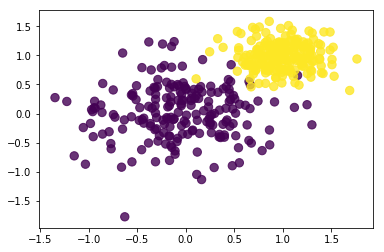

In [1]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [3]:
seed = 123
np.random.seed(seed)

In [4]:
mean, sigma, size = 0, 1, 500
my_array = np.random.normal(loc=mean, scale=sigma, size=(size,) )

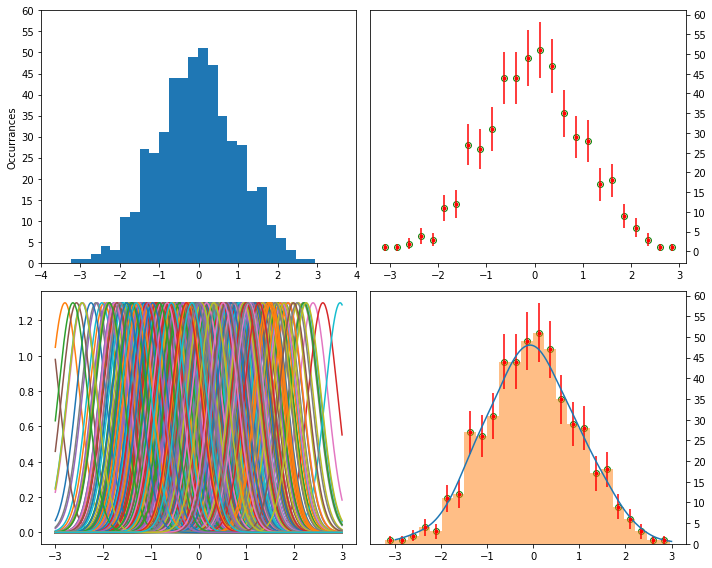

In [24]:
fig, ax = plt.subplots(nrows= 2, ncols=2, figsize=(10, 8))
bins = 25
ax[0,0].set_ylabel('Occurrances') 
entries, edges, _ = ax[0,0].hist(my_array, bins=bins, histtype='bar')
bin_centers = 0.5 * (edges[:-1] + edges[1:])
ax[0,0].set_yticks(np.arange(0,np.amax(entries)+10, 5))
ax[0,0].set_xlim([-4, 4])
ax[0,1].yaxis.tick_right()
ax[0,1].set_yticks(np.arange(0,np.amax(entries)+10, 5))
ax[0,1].scatter(bin_centers, entries, s=35, c='white', edgecolor='green')
ax[0,1].errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.')
x_axis = np.linspace(mean-3*sigma, mean + 3*sigma, size)
for element in my_array:
    ax[1,0].plot(x_axis, stats.norm.pdf(x_axis, element, 1.06*my_array.std()*my_array.size**-0.2)) 
gaussians = [stats.norm.pdf(x_axis, element, 1.06*my_array.std()*my_array.size**-0.2) for element in my_array]
gauss_sum = np.sum([stats.norm.pdf(x_axis, element, 1.06*my_array.std()*my_array.size**-0.2) for element in my_array], axis=0)
histogram_area = sc.integrate.trapezoid(entries, bin_centers)
gaussian_area = sc.integrate.trapezoid(gauss_sum, x_axis)
ax[1,1].plot(x_axis, (histogram_area/gaussian_area)*gauss_sum)
ax[1,1].hist(my_array, bins=bins, histtype='bar', alpha=0.5)
ax[1,1].errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.')
ax[1,1].scatter(bin_centers, entries, s=35, c='white', edgecolor='green')
ax[1,1].set_yticks(np.arange(0,np.amax(entries)+10, 5))
ax[1,1].yaxis.tick_right()
fig.tight_layout()

--2021-11-29 16:31:56--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2021-11-29 16:31:56--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc4c04b895fd23d6b79d8f050767.dl.dropboxusercontent.com/cd/0/inline/Ba746t0RpVk5D-R52_aEbNya-4Xpq-B1eGxUhnvU34ckAL8n0_U-kKESZqmiOur8MnqhtiodxQS_3OT3X22VIaWN2CWfgLNMMk2OqXn2Um43mDT03j67iQ2GPG96L44BEj2R7V4TztG-0_aCY779-Fsv/file# [segue]
--2021-11-29 16:31:57--  https://uc4c04b895fd23d6b79d8f050767.dl.dropboxusercontent.com/cd/0/inline/Ba746t0RpVk5D-R52_aEbNya-4Xpq-B1e

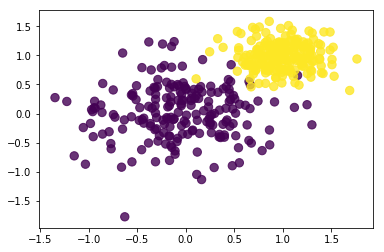

In [6]:
# Example:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [8]:
def data_fram_gen(mean1, cov1, mean2, cov2, size):
    data1 = np.random.multivariate_normal(mean1, cov1, size=size)
    array1 = np.ones((500,3))
    array1[:,:-1] = data1
    data2 = np.random.multivariate_normal(mean2, cov2, size=size)
    array2 = np.zeros((500,3))
    array2[:,:-1] = data2
    final_array = np.append(array1, array2, axis = 0)
    return pd.DataFrame(final_array, columns=['dim1', 'dim2', 'category'])

In [25]:
mean1 = np.array([1,1])
cov1 = np.array([[1,0],[0,1]])
mean2 = np.array([3,3])
cov2 = np.array([[1,0],[0,1]])
#data2 = np.random.multivariate_normal(mean2, cov2, size=(500))
#df2 = pd.DataFrame({'column1' : data2[:,0],
#                 'column2' : data2[:,1],
#                    'category': np.zeros(500)})
#df = df.append(df2)

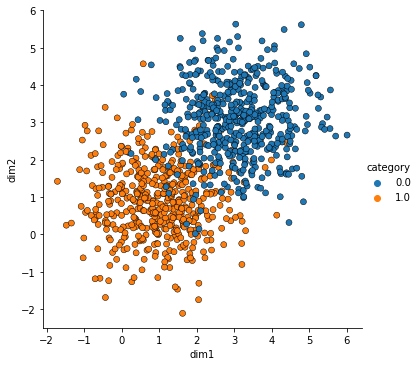

In [26]:
data_to_plot = data_fram_gen(mean1, cov1, mean2, cov2, 500)
sns.relplot(x='dim1', y='dim2',hue='category' ,data=data_to_plot, edgecolor='black')

In [27]:
#!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2021-11-29 16:49:44--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2021-11-29 16:49:44--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc278a2897cef1337f3f57f1592c.dl.dropboxusercontent.com/cd/0/inline/Ba73Ne_9Vq1t8qbi_EGD1hSO50xdhv-3OPqnx2fjy85Z-iLm_Ipyef6wBauMiEFfHhb7TvsF_Z29R14jjjIpnI7tqm6bbbL3T83ssilt9D-D94Dqc9M9Ql3A6kRUi-eIUo1hkmYuT7CnswM93U_mSfWM/file# [segue]
--2021-11-29 16:49:45--  https://uc278a2897cef1337f3f57f1592c.dl.dropboxusercontent.com/cd/0/inline/Ba73Ne_9Vq1t8qbi_EGD1hSO50xdhv-3OPqnx2fjy85Z-iLm_Ipyef6wBauMiEFfHhb7TvsF_Z2

In [33]:
my_array = np.load('residuals_261.npy', allow_pickle=True)

In [37]:
#my_second_array = np.random.normal(0, 1, size=500)
#print(my_second_array)
#def item(array):
#    return array.item()
    
#array2 = np.array(list(map(item, my_second_array)))



In [40]:
df = pd.DataFrame(item(my_array))
df.head(5)

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


In [43]:
#Cleaning the sample
df = df[abs(df['residuals']) < 2]
df.head()

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0


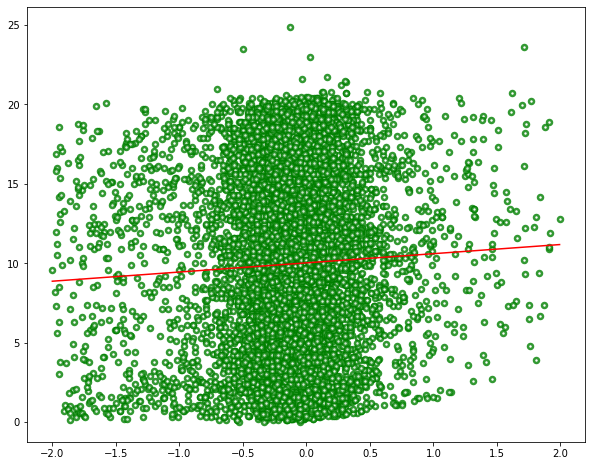

In [103]:
lin_reg = sc.stats.linregress(x=df)
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(10, 8))
ax.scatter(x=df['residuals'], y=df['distances'], s=25, c='white', edgecolors='green', linewidths=2.5, alpha=0.8)
x_axis = np.linspace(np.min(df['residuals']),np.max(df['residuals']), 100)
y_axis = x_axis*lin_reg.slope +lin_reg.intercept
ax.plot(x_axis, y_axis, c='red')

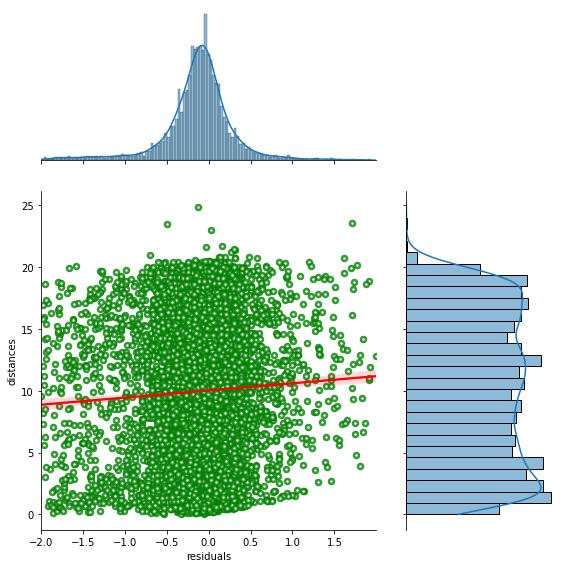

In [104]:
#fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(10, 8))
sns_plot = sns.jointplot(x="residuals", y="distances", data=df, kind="reg", ratio=2, height=8, joint_kws={'line_kws':{'color':'red'},'scatter_kws':{'color':'white','edgecolors':'green', 's':25,'linewidths':2.5,'alpha':0.8}})



In [180]:
bin_edges = np.linspace(0, 20, 5)
# Bin centers
x = [(1/2*(bin_edges[i]+bin_edges[i+1])) for i in range(len(bin_edges)-1)]
print(x)
print(np.linspace(0, 20, 5))
y = [df[(df['distances']>bin_edges[i]) & (df['distances']<=bin_edges[i+1])]['residuals'] for i in range(len(bin_edges)-1)]
y_true=np.array([np.mean(i) for i in y])
print(y_true)


[2.5, 7.5, 12.5, 17.5]
[ 0.  5. 10. 15. 20.]
[-0.16394843 -0.10316411 -0.10143237 -0.12071629]


In [22]:
#np.hstack((data1, np.ones(500)))
#b = np.ones((500,3))à
#b[:,:-1] = data1
#b